<a href="https://colab.research.google.com/github/vicentcamison/idal_ia3/blob/main/1%20Herramientas%20de%20ayuda%20a%20la%20IA/2%20Machine%20learning/Hunger_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

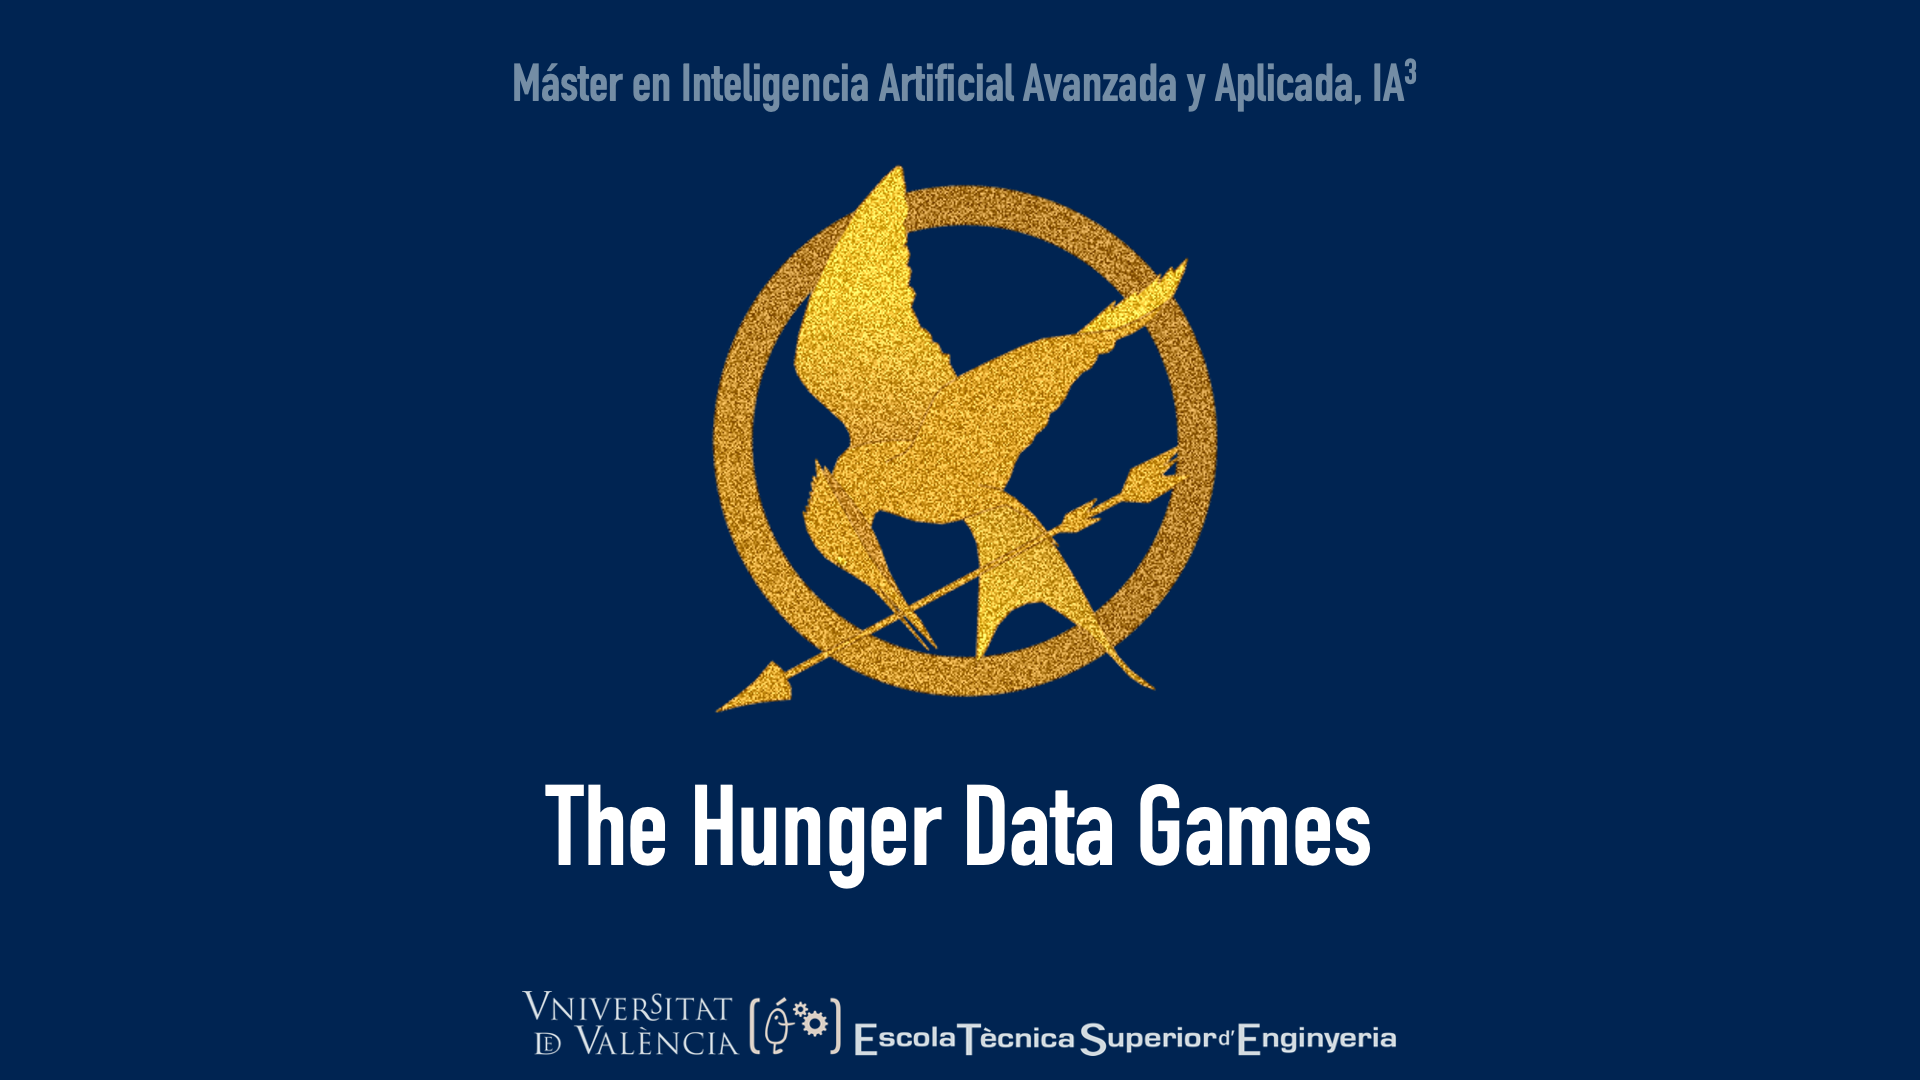

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/hunger_data.csv"
dataframe = pd.read_csv(url, header=0)
dataframe.drop("Unnamed: 0", axis=1, inplace=True)
dataframe.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

In [2]:
# Los datos completos están subidos a mi github. Esta es la dirección desde donde se extraen los datos
url = 'https://raw.githubusercontent.com/vicentcamison/idal_ia3/main/1%20Herramientas%20de%20ayuda%20a%20la%20IA/2%20Machine%20learning/glass.csv'
dataframe = pd.read_csv(url, header=0)
dataframe.columns = ['refractive_index', 'sodium', 'magnesium', 'aluminium', 'silicon', 'potassium', 'calcium', 'barium', 'iron', 'type_of_glass']

The target variable is type_of_glass

In [ ]:
dataframe.head(10)

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

np.random.seed(123)

In [ ]:
dataframe.count()

refractive_index    214
sodium              214
magnesium           214
aluminium           214
silicon             214
potassium           214
calcium             214
barium              214
iron                214
type_of_glass       214
dtype: int64

In [ ]:
#lanzar un primer modelo que muestre unas curvas roc
#chequear curvas roc de las clases más complicadas (minoritarias)
#hacer algún tipo de plot
dataframe.dropna(inplace=True)

In [ ]:
dataframe.count() #no hay entradas vacías

refractive_index    214
sodium              214
magnesium           214
aluminium           214
silicon             214
potassium           214
calcium             214
barium              214
iron                214
type_of_glass       214
dtype: int64

In [ ]:
dataframe.loc[:, 'type_of_glass'].unique() #Las respuestas posibles

array([1, 2, 3, 5, 6, 7])

(array([70., 76., 17.,  0., 13.,  9., 29.]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 7 Patch objects>)

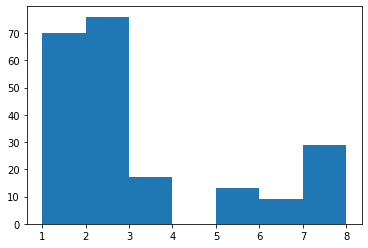

In [ ]:
plt.hist(dataframe.loc[:, 'type_of_glass'], bins=[1, 2, 3, 4, 5, 6, 7, 8])
#tal y como se puede ver, las clases están extremadamente desbalanceadas

In [ ]:
dataframe.describe()

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [3]:
#Separamos la entrada en X e Y crudos
X = dataframe.drop('type_of_glass', axis=1)
X

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [4]:
Y = dataframe.loc[:, 'type_of_glass']
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: type_of_glass, Length: 214, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d3ccb5358>,
      dtype=object)

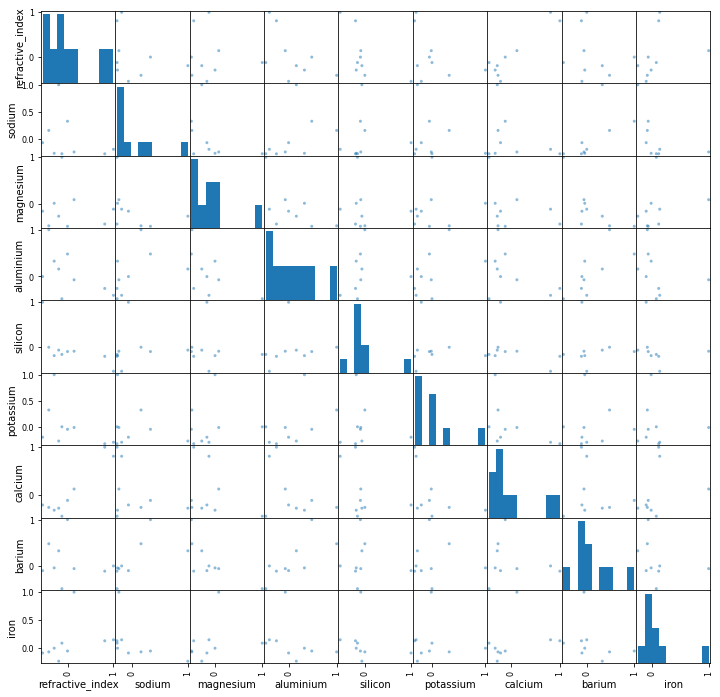

In [ ]:
# Calculamos la correlación en X para ver 
pd.plotting.heatmap(X.corr(), figsize=(12.0, 12.0))

In [7]:
#Dividimos los datos en un set de entrenamiento y otro de testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=123)
model = LogisticRegression()

model.fit(X_train, Y_train)
model.score(X_test, Y_test)
print(model.predict_proba(X_test))

[[2.20259591e-01 7.43301985e-01 1.78206790e-03 3.17114551e-02
  1.67546147e-04 2.77735468e-03]
 [7.61193903e-06 1.25247395e-02 5.37424525e-04 1.06556370e-01
  2.10667868e-01 6.69705985e-01]
 [5.94459857e-01 3.42027709e-01 4.73761467e-02 7.90205084e-03
  3.46633492e-03 4.76790136e-03]
 [5.63587978e-02 6.65790864e-01 4.93158536e-02 1.21378055e-01
  4.80486585e-02 5.91077703e-02]
 [3.44015174e-01 5.17311618e-01 8.07227783e-02 2.17806965e-02
  1.62890574e-02 1.98806763e-02]
 [5.59129964e-01 3.76141013e-01 5.03712488e-02 8.46929097e-03
  2.87068078e-03 3.01780244e-03]
 [6.88092374e-06 5.33157963e-03 2.98680028e-04 3.65683959e-02
  7.09828055e-02 8.86811658e-01]
 [3.97359867e-01 4.00356288e-01 1.71633897e-01 1.12884966e-02
  1.46796327e-02 4.68181862e-03]
 [1.31354415e-03 4.08430277e-02 8.38850093e-02 3.42533310e-02
  6.67050637e-01 1.72654451e-01]
 [3.63020708e-01 5.48392944e-01 4.59531558e-02 2.22419236e-02
  5.83982488e-03 1.45514435e-02]
 [3.24967789e-01 4.82882008e-01 1.29390810e-01 2.3

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#Hacemos la curva ROC del modelo

#La curva ROC únicamente chequea el estado de una de las clases, hemos de crear unas nuevas columnas que determinen si ha sido un acierto o un fallo

#Transform into probabilities
new_probs = []
for value in Y_test:
  if value == 2:
    new_probs.append(1.0)
  else:
    new_probs.append(0.0)


fpr, tpr, thresholds = roc_curve(new_probs, list(model.predict_proba(X_test)[:,1]), drop_intermediate=False)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})
roc_auc_score(new_probs, list(model.predict_proba(X_test)[:,1]))

0.7176470588235293

In [ ]:
fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()
fig.show()

In [ ]:
#CÓDIGO FALLIDO

#Hay otra forma de hacer la curva ROC sin necesidad de pegar toda la vuelta que se está pegando al crear una nueva clase con 0 y 1.
# Uno de los paraḿetros de roc_curve permite elegir la columna Y con las posibles opciones, y luego indicar en un parámetro cuál es la positiva
# Las entries de Y que coincidan con el parámetro serán consideradas como positivas, y el resto como negativas

#Sin embargo, esto explicado arriba sólo se puede usar cn roc_curve pero no con roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, list(model.predict_proba(X_test)[:,1]), pos_label=1, drop_intermediate=False)
df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})
roc_auc_score(Y_test, list(model.predict_proba(X_test)[:,1]), pos_label)

NameError: ignored

In [ ]:
#Miércoles, 04/11/2020

#Usemos GRIDSEARCH CV para hacer una búsqueda para encontrar los hiperparámetros más apropiados
param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [5, 10, 15], 'n_estimators': [100, 200, 300]}
model = RandomForestClassifier()
cv = GridSearchCV(model, param_grid, scoring=["f1_micro", "balanced_accuracy"], cv=3, refit=False)

In [ ]:
cv.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
results = pd.DataFrame(cv.cv_results_)
results = pd.concat([results, pd.DataFrame((results.loc[:, 'rank_test_f1_micro'] + results.loc[:, 'rank_test_balanced_accuracy']) / 2, columns=['rank'])], axis=1)
results.sort_values(by=['rank'])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro,split0_test_balanced_accuracy,split1_test_balanced_accuracy,split2_test_balanced_accuracy,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,rank
18,0.122009,0.000722,0.011207,0.002355,20,5,100,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.833333,0.716981,0.716981,0.755765,0.054849,1,0.775000,0.554825,0.684942,0.671589,0.090381,1,1.0
19,0.242593,0.002288,0.016584,0.000215,20,5,200,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.777778,0.735849,0.698113,0.737247,0.032538,2,0.630556,0.610380,0.629386,0.623441,0.009247,2,2.0
10,0.249481,0.003172,0.016907,0.000320,10,5,200,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.796296,0.716981,0.679245,0.730841,0.048780,4,0.686111,0.554825,0.620614,0.620517,0.053598,3,3.5
11,0.383611,0.014375,0.026266,0.003806,10,5,300,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.759259,0.716981,0.698113,0.724785,0.025565,5,0.527778,0.601608,0.629386,0.586257,0.042878,4,4.5
21,0.122317,0.000880,0.009401,0.000074,20,10,100,"{'max_depth': 20, 'min_samples_split': 10, 'n_...",0.759259,0.716981,0.698113,0.724785,0.025565,5,0.528704,0.554825,0.629386,0.570971,0.042660,7,6.0
0,0.123908,0.002422,0.009647,0.000390,5,5,100,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.796296,0.754717,0.622642,0.724552,0.074034,8,0.638889,0.572368,0.514620,0.575292,0.050775,6,7.0
9,0.129842,0.004999,0.009668,0.000205,10,5,100,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.777778,0.679245,0.698113,0.718379,0.042702,9,0.584259,0.537281,0.629386,0.583642,0.037604,5,7.0
23,0.361578,0.006571,0.023228,0.000203,20,10,300,"{'max_depth': 20, 'min_samples_split': 10, 'n_...",0.777778,0.679245,0.716981,0.724668,0.040591,7,0.537037,0.537281,0.638158,0.570825,0.047612,8,7.5
12,0.125186,0.000545,0.009816,0.000211,10,10,100,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",0.777778,0.735849,0.679245,0.730957,0.040374,3,0.537037,0.563596,0.466374,0.522336,0.041030,12,7.5
1,0.243177,0.002586,0.016424,0.000200,5,5,200,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.759259,0.716981,0.660377,0.712206,0.040509,10,0.527778,0.554825,0.625731,0.569444,0.041304,9,9.5


In [ ]:
#Según lo de arriba, las pruebas han ido extremadamente mal. Vamos a hacer un único fit, y mostrar las métricas para comprobar que, de verdad, ha salido tan mal
model2 = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5)
model2.fit(X_train, Y_train)
f1 = f1_score(Y_test, model2.predict(X_test), average='micro')
print(f'f1 score: {f1}    bal acc: {balanced_accuracy_score(Y_test, model2.predict(X_test))}')

f1 score: 0.7222222222222222    bal acc: 0.6166666666666666


In [ ]:
model2 = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5)
model2.fit(X_train, Y_train)
f1 = f1_score(Y_test, model2.predict(X_test), average='micro')
print(f'f1 score: {f1}    bal acc: {balanced_accuracy_score(Y_test, model2.predict(X_test))}')

f1 score: 0.7962962962962963    bal acc: 0.6722222222222222


In [ ]:
# JUEVES, 05/11/2020

#Vamos a hacer pruebas con el RandomizedSearchCV y ver en lo que se diferencia con el GridSearchCV

#Usemos RANDOMIZEDSEARCH CV para hacer una búsqueda para encontrar los hiperparámetros más apropiados
param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [5, 6, 7, 8, 9, 10, 15], 'n_estimators': [100, 200, 300]}
model = RandomForestClassifier()
cv = GridSearchCV(model, param_grid, scoring=["f1_micro", "balanced_accuracy"], cv=3, refit=False)

# SMOTE + Gridsearch a diferentes clasificadores

In [8]:
# DOMINGO 08/11/2020
# MARTES 10/11/2020

#Vamos a hacer pruebas con SMOTE para las clases desbalanceadas

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=123)
X_res, Y_res = sm.fit_resample(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing i

**Logistic Regression + SMOTE + Gridsearch**

In [ ]:
# MIÉRCOLES 11/11/2020

#Hacemos un gridsearch 'rapidito' a unos cuantos métodos de machine learning
# Random forest, Logistic Regression, GaussianNB (naive Bayes), CategoricalNB, SVC (support vector machines classifier)

# LOGISTIC REGRESSION + SMOTE
model1 = LogisticRegression()
param_grid1 = {'penalty': ['l2'], 'max_iter': [50, 100, 500, 1000], 'random_state': [123], 'tol': [1e-4, 1e-3, 1e-5, 1e-2], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
cv1 = GridSearchCV(model1, param_grid1, scoring=["f1_micro", "balanced_accuracy"], refit=False)
cv1.fit(X_res, Y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alte

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': [50, 100, 500, 1000], 'penalty': ['l2'],
                         'random_state': [123],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 1e-05, 0.01]},
             pre_dispatch='2*n_jobs',

In [ ]:
results1 = pd.DataFrame(cv1.cv_results_)
results1 = pd.concat([results1, pd.DataFrame((results1.loc[:, 'rank_test_f1_micro'] + results1.loc[:, 'rank_test_balanced_accuracy']) / 2, columns=['rank'])], axis=1)
results1.sort_values(by=['rank'])
results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_penalty,param_random_state,param_solver,param_tol,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro,split0_test_balanced_accuracy,split1_test_balanced_accuracy,split2_test_balanced_accuracy,split3_test_balanced_accuracy,split4_test_balanced_accuracy,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,rank
0,0.175941,0.009752,0.001770,0.000281,50,l2,123,newton-cg,0.0001,"{'max_iter': 50, 'penalty': 'l2', 'random_stat...",0.785714,0.800000,0.757143,0.768116,0.768116,0.775818,0.015166,7,0.790404,0.799242,0.753788,0.768939,0.766414,0.775758,0.016628,7,7.0
1,0.154236,0.014916,0.001525,0.000037,50,l2,123,newton-cg,0.001,"{'max_iter': 50, 'penalty': 'l2', 'random_stat...",0.785714,0.800000,0.757143,0.768116,0.768116,0.775818,0.015166,7,0.790404,0.799242,0.753788,0.768939,0.766414,0.775758,0.016628,7,7.0
2,0.179827,0.015614,0.001724,0.000322,50,l2,123,newton-cg,1e-05,"{'max_iter': 50, 'penalty': 'l2', 'random_stat...",0.785714,0.800000,0.757143,0.768116,0.768116,0.775818,0.015166,7,0.790404,0.799242,0.753788,0.768939,0.766414,0.775758,0.016628,7,7.0
3,0.139016,0.012331,0.001504,0.000013,50,l2,123,newton-cg,0.01,"{'max_iter': 50, 'penalty': 'l2', 'random_stat...",0.785714,0.800000,0.757143,0.768116,0.768116,0.775818,0.015166,7,0.790404,0.799242,0.753788,0.768939,0.766414,0.775758,0.016628,7,7.0
4,0.020276,0.000378,0.002272,0.000219,50,l2,123,lbfgs,0.0001,"{'max_iter': 50, 'penalty': 'l2', 'random_stat...",0.714286,0.785714,0.742857,0.739130,0.710145,0.738427,0.026977,51,0.719697,0.784091,0.741162,0.737374,0.710859,0.738636,0.025316,51,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.010007,0.001278,0.001683,0.000318,1000,l2,123,sag,0.01,"{'max_iter': 1000, 'penalty': 'l2', 'random_st...",0.642857,0.742857,0.671429,0.724638,0.666667,0.689689,0.037696,67,0.650253,0.737374,0.666667,0.726010,0.667929,0.689646,0.035076,67,67.0
76,0.183048,0.001456,0.002158,0.000444,1000,l2,123,saga,0.0001,"{'max_iter': 1000, 'penalty': 'l2', 'random_st...",0.742857,0.800000,0.757143,0.768116,0.724638,0.758551,0.025329,35,0.747475,0.797980,0.753788,0.768939,0.724747,0.758586,0.024292,35,35.0
77,0.069199,0.003014,0.001654,0.000073,1000,l2,123,saga,0.001,"{'max_iter': 1000, 'penalty': 'l2', 'random_st...",0.714286,0.785714,0.714286,0.753623,0.695652,0.732712,0.032555,55,0.719697,0.784091,0.710859,0.753788,0.696970,0.733081,0.031647,55,55.0
78,0.187663,0.004392,0.002411,0.000450,1000,l2,123,saga,1e-05,"{'max_iter': 1000, 'penalty': 'l2', 'random_st...",0.742857,0.800000,0.757143,0.768116,0.724638,0.758551,0.025329,35,0.747475,0.797980,0.753788,0.768939,0.724747,0.758586,0.024292,35,35.0


In [ ]:
#print(f'f1 micro:{results1.iloc[0].loc['mean_test_f1_micro']}  balanced_accuracy:{results1.iloc[0].loc['mean_test_balanced_accuracy']}')
print('f1 micro:',results1.loc[0,'mean_test_f1_micro'],'  balanced_accuracy:',results1.loc[0, 'mean_test_balanced_accuracy']) 

f1 micro: 0.7758178053830227   balanced_accuracy: 0.7757575757575758


**Random forest + SMOTE + Gridsearch**

In [ ]:
# RANDOM FOREST + SMOTE
model2 = RandomForestClassifier()
param_grid2 = {'max_depth': [5, 10, 20], 'min_samples_split': [5, 10, 15], 'n_estimators': [100, 200, 300, 400]}
cv2 = GridSearchCV(model2, param_grid2, scoring=["f1_micro", "balanced_accuracy"], refit=False)
cv2.fit(X_res, Y_res)

results2 = pd.DataFrame(cv2.cv_results_)
results2 = pd.concat([results2, pd.DataFrame((results2.loc[:, 'rank_test_f1_micro'] + results2.loc[:, 'rank_test_balanced_accuracy']) / 2, columns=['rank'])], axis=1)
results2.sort_values(by=['rank'])
results2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro,split0_test_balanced_accuracy,split1_test_balanced_accuracy,split2_test_balanced_accuracy,split3_test_balanced_accuracy,split4_test_balanced_accuracy,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,rank
0,0.146168,0.002371,0.009970,0.000104,5,5,100,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.828571,0.828571,0.914286,0.869565,0.884058,0.865010,0.033067,27,0.833333,0.828283,0.912879,0.872475,0.883838,0.866162,0.031772,26,26.5
1,0.286207,0.001351,0.017763,0.001353,5,5,200,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.885714,0.828571,0.900000,0.869565,0.884058,0.873582,0.024482,24,0.888889,0.827020,0.900253,0.871212,0.883838,0.874242,0.025386,23,23.5
2,0.452107,0.032087,0.024838,0.000601,5,5,300,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.828571,0.814286,0.914286,0.869565,0.898551,0.865052,0.038664,26,0.833333,0.811869,0.914141,0.872475,0.898990,0.866162,0.038588,27,26.5
3,0.577636,0.002534,0.032078,0.000319,5,5,400,"{'max_depth': 5, 'min_samples_split': 5, 'n_es...",0.871429,0.800000,0.900000,0.869565,0.855072,0.859213,0.032995,30,0.875000,0.797980,0.898990,0.871212,0.854798,0.859596,0.033893,30,30.0
4,0.146075,0.002202,0.010271,0.000566,5,10,100,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.842857,0.814286,0.914286,0.855072,0.884058,0.862112,0.034384,29,0.847222,0.813131,0.911616,0.857323,0.883838,0.862626,0.033362,28,28.5
5,0.293858,0.014118,0.016778,0.000495,5,10,200,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.871429,0.814286,0.885714,0.840580,0.855072,0.853416,0.024764,32,0.875000,0.811869,0.883838,0.842172,0.854798,0.853535,0.025479,32,32.0
6,0.432024,0.006311,0.025648,0.001924,5,10,300,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.842857,0.800000,0.871429,0.869565,0.855072,0.847785,0.026055,36,0.847222,0.797980,0.869949,0.871212,0.854798,0.848232,0.026718,36,36.0
7,0.572292,0.004719,0.032104,0.000750,5,10,400,"{'max_depth': 5, 'min_samples_split': 10, 'n_e...",0.871429,0.800000,0.885714,0.869565,0.884058,0.862153,0.031746,28,0.875000,0.797980,0.883838,0.871212,0.883838,0.862374,0.032575,29,28.5
8,0.143036,0.002678,0.009363,0.000277,5,15,100,"{'max_depth': 5, 'min_samples_split': 15, 'n_e...",0.842857,0.800000,0.885714,0.855072,0.869565,0.850642,0.029096,34,0.847222,0.797980,0.883838,0.856061,0.869949,0.851010,0.029286,35,34.5
9,0.285509,0.002459,0.017164,0.000549,5,15,200,"{'max_depth': 5, 'min_samples_split': 15, 'n_e...",0.842857,0.814286,0.857143,0.855072,0.884058,0.850683,0.022631,33,0.847222,0.811869,0.856061,0.856061,0.885101,0.851263,0.023492,33,33.0


In [ ]:
print('f1 micro:',results2.loc[0,'mean_test_f1_micro'],'  balanced_accuracy:',results2.loc[0, 'mean_test_balanced_accuracy'])

f1 micro: 0.8650103519668738   balanced_accuracy: 0.8661616161616162


**Gaussian Niave Bayes + SMOTE + Gridsearch**

In [ ]:
# GAUSSIAN NAIVE BAYES + SMOTE
model3 = GaussianNB()
param_grid3 = {'var_smoothing': [1e-9, 1e-10, 1e-11, 1e-8, 1e-7]}
cv3 = GridSearchCV(model3, param_grid3, scoring=["f1_micro", "balanced_accuracy"], refit=False)
cv3.fit(X_res, Y_res)

results3 = pd.DataFrame(cv3.cv_results_)
results3 = pd.concat([results3, pd.DataFrame((results3.loc[:, 'rank_test_f1_micro'] + results3.loc[:, 'rank_test_balanced_accuracy']) / 2, columns=['rank'])], axis=1)
results3.sort_values(by=['rank'])
results3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_f1_micro,split1_test_f1_micro,split2_test_f1_micro,split3_test_f1_micro,split4_test_f1_micro,mean_test_f1_micro,std_test_f1_micro,rank_test_f1_micro,split0_test_balanced_accuracy,split1_test_balanced_accuracy,split2_test_balanced_accuracy,split3_test_balanced_accuracy,split4_test_balanced_accuracy,mean_test_balanced_accuracy,std_test_balanced_accuracy,rank_test_balanced_accuracy,rank
0,0.001610,0.001387,0.001687,0.000302,1e-09,{'var_smoothing': 1e-09},0.714286,0.671429,0.842857,0.753623,0.594203,0.715280,0.082861,2,0.719697,0.667929,0.835859,0.755051,0.602273,0.716162,0.078929,2,2.0
1,0.000741,0.000009,0.001424,0.000104,1e-10,{'var_smoothing': 1e-10},0.714286,0.671429,0.842857,0.753623,0.594203,0.715280,0.082861,2,0.719697,0.667929,0.835859,0.755051,0.602273,0.716162,0.078929,2,2.0
2,0.000824,0.000095,0.001453,0.000108,1e-11,{'var_smoothing': 1e-11},0.714286,0.671429,0.842857,0.753623,0.594203,0.715280,0.082861,2,0.719697,0.667929,0.835859,0.755051,0.602273,0.716162,0.078929,2,2.0
3,0.000768,0.000009,0.001451,0.000017,1e-08,{'var_smoothing': 1e-08},0.714286,0.671429,0.842857,0.753623,0.594203,0.715280,0.082861,2,0.719697,0.667929,0.835859,0.755051,0.602273,0.716162,0.078929,2,2.0
4,0.000835,0.000157,0.001532,0.000152,1e-07,{'var_smoothing': 1e-07},0.714286,0.685714,0.842857,0.753623,0.594203,0.718137,0.081535,1,0.719697,0.681818,0.835859,0.755051,0.602273,0.718939,0.077413,1,1.0


In [ ]:
print('f1 micro:',results3.loc[0,'mean_test_f1_micro'],'  balanced_accuracy:',results3.loc[0, 'mean_test_balanced_accuracy'])

f1 micro: 0.7152795031055901   balanced_accuracy: 0.7161616161616161


**Categorical Naive Bayes + SMOTE + Gridsearch**

In [ ]:
# CATEGORICAL NAIVE BAYES + SMOTE
model4 = CategoricalNB()
param_grid4 = {'alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100], 'fit_prior': [True, False]}
cv4 = GridSearchCV(model4, param_grid4, scoring=["f1_micro", "balanced_accuracy"], refit=False)
cv4.fit(X_res, Y_res)

results4 = pd.DataFrame(cv4.cv_results_)
results4 = pd.concat([results4, pd.DataFrame((results4.loc[:, 'rank_test_f1_micro'] + results4.loc[:, 'rank_test_balanced_accuracy']) / 2, columns=['rank'])], axis=1)
results4.sort_values(by=['rank'])
results4

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10



IndexError: ignored

In [32]:
#Revisemos los datos de entrada tras el SMOTE
smote_data = pd.DataFrame(np.append(X_res, np.reshape(Y_res, [np.shape(Y_res)[0], 1]), axis=1))
smote_data

,0,1,2,3,4,5,6,7,8,9
0,1.523200,13.720000,3.720000,0.510000,71.750000,0.090000,10.060000,0.000000,0.160000,1.0
1,1.521720,13.510000,3.860000,0.880000,71.790000,0.230000,9.540000,0.000000,0.110000,1.0
2,1.522220,14.430000,0.000000,1.000000,72.670000,0.100000,11.520000,0.000000,0.080000,2.0
3,1.516270,13.000000,3.580000,1.540000,72.830000,0.610000,8.040000,0.000000,0.000000,2.0
4,1.512990,14.400000,1.740000,1.540000,74.550000,0.000000,7.590000,0.000000,0.000000,6.0
...,...,...,...,...,...,...,...,...,...,...
343,1.516892,13.374780,0.000000,1.746164,74.042676,1.012761,8.736280,1.043589,0.000000,7.0
344,1.516705,14.331203,0.000000,1.985544,73.528672,0.000000,8.525544,1.602531,0.000000,7.0
345,1.516664,14.029640,0.526576,2.451397,73.230766,0.161982,9.032162,0.513829,0.042117,7.0
346,1.516440,12.132197,0.000000,1.313961,75.031081,2.482029,8.941647,0.050749,0.004160,7.0


**Histograma antes y después del SMOTE**

(array([[70., 76., 17.,  0., 13.,  9., 29.],
        [58., 58., 58.,  0., 58., 58., 58.]]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 2 Lists of Patches objects>)

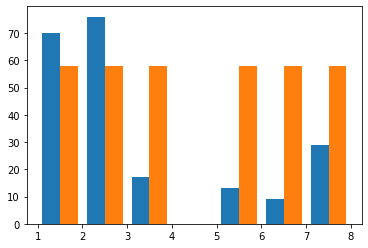

In [ ]:
plt.hist([dataframe.loc[:, 'type_of_glass'], smote_data.iloc[:, 9]], bins=[1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
quantity = np.zeros(7)
for i in range(1,int(max(smote_data.iloc[:,9]))+1):
  quantity[i-1] = (smote_data.iloc[:,9] == i).sum()
quantity

array([58., 58., 58.,  0., 58., 58., 58.])

**Random forest + SMOTE + Random Search + default score**

In [ ]:
# RANDOM FOREST + RANDOM SEARCH + SMOTE + DEFAULT RANKING
model5 = RandomForestClassifier()
param_grid5 = {'max_depth': np.arange(1, 30), 'min_samples_split': np.arange(2, 30), 'n_estimators': np.arange(50, 600)}
cv5 = RandomizedSearchCV(model5, param_grid5 , refit=False, random_state=123, n_iter=200)
cv5.fit(X_res, Y_res)

results5 = pd.DataFrame(cv5.cv_results_)
#results4 = pd.concat([results4, pd.DataFrame((results4.loc[:, 'rank_test_f1_micro'] + results4.loc[:, 'rank_test_balanced_accuracy']) / 2, columns=['rank'])], axis=1)
#results4.sort_values(by=['rank'])
results5.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
103,0.207800,0.002857,0.011258,0.000116,143,5,24,"{'n_estimators': 143, 'min_samples_split': 5, ...",0.928571,0.900000,0.971429,0.898551,0.898551,0.919420,0.028414,1
83,0.683260,0.002597,0.036163,0.000652,471,2,25,"{'n_estimators': 471, 'min_samples_split': 2, ...",0.900000,0.885714,0.971429,0.898551,0.913043,0.913747,0.030111,2
154,0.801828,0.005558,0.042003,0.002236,343,3,26,"{'n_estimators': 343, 'min_samples_split': 3, ...",0.914286,0.857143,0.971429,0.898551,0.913043,0.910890,0.036666,3
66,0.686624,0.005134,0.036409,0.000996,472,2,20,"{'n_estimators': 472, 'min_samples_split': 2, ...",0.914286,0.871429,0.971429,0.898551,0.898551,0.910849,0.033281,4
1,0.244172,0.001442,0.013280,0.000364,169,3,19,"{'n_estimators': 169, 'min_samples_split': 3, ...",0.885714,0.871429,0.957143,0.913043,0.913043,0.908075,0.029326,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.210683,0.003225,0.012425,0.000102,171,24,1,"{'n_estimators': 171, 'min_samples_split': 24,...",0.642857,0.614286,0.642857,0.652174,0.681159,0.646667,0.021437,196
81,0.673122,0.001665,0.039453,0.001288,547,17,1,"{'n_estimators': 547, 'min_samples_split': 17,...",0.614286,0.642857,0.614286,0.681159,0.652174,0.640952,0.025173,197
155,0.778559,0.091919,0.044497,0.009306,411,23,1,"{'n_estimators': 411, 'min_samples_split': 23,...",0.628571,0.657143,0.614286,0.652174,0.652174,0.640870,0.016603,198
33,0.121160,0.001955,0.007402,0.000051,98,14,1,"{'n_estimators': 98, 'min_samples_split': 14, ...",0.614286,0.642857,0.628571,0.652174,0.652174,0.638012,0.014674,199


In [ ]:
results5.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
103,0.207800,0.002857,0.011258,0.000116,143,5,24,"{'n_estimators': 143, 'min_samples_split': 5, ...",0.928571,0.900000,0.971429,0.898551,0.898551,0.919420,0.028414,1
83,0.683260,0.002597,0.036163,0.000652,471,2,25,"{'n_estimators': 471, 'min_samples_split': 2, ...",0.900000,0.885714,0.971429,0.898551,0.913043,0.913747,0.030111,2
154,0.801828,0.005558,0.042003,0.002236,343,3,26,"{'n_estimators': 343, 'min_samples_split': 3, ...",0.914286,0.857143,0.971429,0.898551,0.913043,0.910890,0.036666,3
66,0.686624,0.005134,0.036409,0.000996,472,2,20,"{'n_estimators': 472, 'min_samples_split': 2, ...",0.914286,0.871429,0.971429,0.898551,0.898551,0.910849,0.033281,4
1,0.244172,0.001442,0.013280,0.000364,169,3,19,"{'n_estimators': 169, 'min_samples_split': 3, ...",0.885714,0.871429,0.957143,0.913043,0.913043,0.908075,0.029326,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.210683,0.003225,0.012425,0.000102,171,24,1,"{'n_estimators': 171, 'min_samples_split': 24,...",0.642857,0.614286,0.642857,0.652174,0.681159,0.646667,0.021437,196
81,0.673122,0.001665,0.039453,0.001288,547,17,1,"{'n_estimators': 547, 'min_samples_split': 17,...",0.614286,0.642857,0.614286,0.681159,0.652174,0.640952,0.025173,197
155,0.778559,0.091919,0.044497,0.009306,411,23,1,"{'n_estimators': 411, 'min_samples_split': 23,...",0.628571,0.657143,0.614286,0.652174,0.652174,0.640870,0.016603,198
33,0.121160,0.001955,0.007402,0.000051,98,14,1,"{'n_estimators': 98, 'min_samples_split': 14, ...",0.614286,0.642857,0.628571,0.652174,0.652174,0.638012,0.014674,199


# Normalización de las variables + Gradient boosting

**Normalización de las variables**

In [9]:
# Vamos a probar ahora a normalizar los valores de entrada para el modelo

#E lescalado concreto no importa tanto, ya que el razonamiento que hay debajo de él es ayudar en el proceso de fit y hacer que
# la diferencia entre los rangos de valores en diferentes características no afecte al resultado.
# Por tanto, aunque el resutado no sea el mismo, aplicamos el StandardScaler a la muestra ya SMOTEada.

ss_X = StandardScaler()
ss_X.fit(X_res) #X_res es la muestra ya SMOTEada, a diferencia de X_train

X_res_s = ss_X.transform(X_train)
X_test_s = ss_X.transform(X_test)

**Gradient boosting**

In [22]:
import xgboost as xgb

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [10, 25 ,50, 100, 150, 200, 300, 500]}

xgb_clf = xgb.XGBClassifier()

rs_clf = RandomizedSearchCV(xgb_clf, param_grid, n_iter=150,
                            n_jobs=1, verbose=2, cv=3,
                            refit=True, random_state=123)

rs_clf.fit(X_res, Y_res)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8 
[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.1s
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.2s
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8 
[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.1s
[CV] subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=300, min_child_weight=7.0, max_depth=6, learning_rate=0, gamma=0.5, colsample_bytree=0.5, colsample_bylevel=0.4 
[CV]  subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=300, min_child_weight=7.0, max_depth=6, learning_rate=0, gamma=0.5, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.2s
[CV] subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=300

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   58.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0, 3],
                               

In [23]:
#score = rs_clf.score(np.array(X_test), np.array(Y_test))
#print(score)

results6 = pd.DataFrame(rs_clf.cv_results_)
#results4 = pd.concat([results4, pd.DataFrame((results4.loc[:, 'rank_test_f1_micro'] + results4.loc[:, 'rank_test_balanced_accuracy']) / 2, columns=['rank'])], axis=1)
#results4.sort_values(by=['rank'])
results6.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_silent,param_reg_lambda,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,param_colsample_bylevel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
24,0.220222,0.000819,0.005384,0.000055,0.8,False,0.1,150,0.5,10,0.001,1,1,0.7,"{'subsample': 0.8, 'silent': False, 'reg_lambd...",0.879310,0.879310,0.931034,0.896552,0.024383,1
116,0.204129,0.001838,0.008783,0.000426,1,False,0.1,200,1,6,0.001,0,0.7,0.6,"{'subsample': 1.0, 'silent': False, 'reg_lambd...",0.862069,0.896552,0.922414,0.893678,0.024719,2
127,0.317692,0.001773,0.013699,0.000900,0.8,False,50,500,3,6,0.2,0,0.6,0.8,"{'subsample': 0.8, 'silent': False, 'reg_lambd...",0.870690,0.887931,0.896552,0.885057,0.010752,3
28,0.204096,0.000826,0.002882,0.000274,0.9,False,5,150,0.5,10,0.2,0.25,0.9,0.9,"{'subsample': 0.9, 'silent': False, 'reg_lambd...",0.870690,0.870690,0.913793,0.885057,0.020319,3
105,0.055994,0.001306,0.002585,0.000026,0.9,False,0.1,50,1,20,0.001,1,0.7,0.4,"{'subsample': 0.9, 'silent': False, 'reg_lambd...",0.870690,0.870690,0.905172,0.882184,0.016255,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,0.087808,0.004818,0.003708,0.000027,0.9,False,5,100,3,10,0,0.5,0.4,1,"{'subsample': 0.9, 'silent': False, 'reg_lambd...",0.172414,0.163793,0.163793,0.166667,0.004064,124
41,0.237244,0.003546,0.010199,0.000014,1,False,0.1,300,5,15,0,0.25,0.6,0.7,"{'subsample': 1.0, 'silent': False, 'reg_lambd...",0.172414,0.163793,0.163793,0.166667,0.004064,124
119,0.089119,0.001567,0.003467,0.000064,0.5,False,10,150,7,20,0,0,0.8,0.6,"{'subsample': 0.5, 'silent': False, 'reg_lambd...",0.172414,0.163793,0.163793,0.166667,0.004064,124
0,0.143937,0.002194,0.005176,0.000011,0.5,False,1,300,10,15,0,1,0.5,0.8,"{'subsample': 0.5, 'silent': False, 'reg_lambd...",0.172414,0.163793,0.163793,0.166667,0.004064,124


In [24]:
f1 = f1_score(np.array(Y_test), rs_clf.predict(np.array(X_test)), average='micro')
bal_ac = balanced_accuracy_score(np.array(Y_test), rs_clf.predict(np.array(X_test)))
print(f1, bal_ac)

0.8333333333333334 0.8250000000000001


In [25]:
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

xgb_clf = xgb.XGBClassifier()

rs_clf = RandomizedSearchCV(xgb_clf, param_grid, n_iter=100,
                            n_jobs=1, verbose=2, cv=3,
                            refit=True, random_state=123)

rs_clf.fit(X_res, Y_res)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0.25, colsample_bytree=0.6, colsample_bylevel=0.9 
[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0.25, colsample_bytree=0.6, colsample_bylevel=0.9, total=   0.1s
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0.25, colsample_bytree=0.6, colsample_bylevel=0.9 
[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0.25, colsample_bytree=0.6, colsample_bylevel=0.9, total=   0.1s
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0.25, colsample_bytree=0.6, colsample_bylevel=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=10, learning_rate=0.01, gamma=0.25, colsample_bytree=0.6, colsample_bylevel=0.9, total=   0.1s
[CV] subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.5 
[CV]  subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.5, total=   0.1s
[CV] subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.5 
[CV]  subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=100, min_child_weight=3.0, max_depth=15, learning_rate=0.2, gamma=0.25, colsample_bytree=1.0, colsample_bylevel=0.5, total=   0.1s
[CV] subsample=0.8, silent=False, reg_lambda=10.0

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   24.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                          

In [26]:
#score = rs_clf.score(np.array(X_test), np.array(Y_test))
#print(score)

results7 = pd.DataFrame(rs_clf.cv_results_)
#results4 = pd.concat([results4, pd.DataFrame((results4.loc[:, 'rank_test_f1_micro'] + results4.loc[:, 'rank_test_balanced_accuracy']) / 2, columns=['rank'])], axis=1)
#results4.sort_values(by=['rank'])
results7.sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_silent,param_reg_lambda,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,param_colsample_bylevel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.111436,0.002602,0.003282,0.000014,0.8,False,10,100,1,10,0.1,0.25,0.8,0.8,"{'subsample': 0.8, 'silent': False, 'reg_lambd...",0.870690,0.896552,0.896552,0.887931,0.012191,1
83,0.080394,0.001632,0.002278,0.000041,0.7,False,0.1,100,1,20,0.2,0.25,0.6,0.8,"{'subsample': 0.7, 'silent': False, 'reg_lambd...",0.887931,0.870690,0.905172,0.887931,0.014078,1
74,0.081522,0.004619,0.004099,0.000044,0.7,False,1,100,1,6,0.1,0,0.6,0.5,"{'subsample': 0.7, 'silent': False, 'reg_lambd...",0.870690,0.887931,0.896552,0.885057,0.010752,3
44,0.122369,0.001671,0.002209,0.000029,1,False,1,100,0.5,10,0.1,1,0.9,0.5,"{'subsample': 1.0, 'silent': False, 'reg_lambd...",0.862069,0.879310,0.913793,0.885057,0.021504,4
67,0.066338,0.002319,0.002981,0.000046,0.6,False,0.1,100,1,20,0.2,0,0.7,0.5,"{'subsample': 0.6, 'silent': False, 'reg_lambd...",0.879310,0.853448,0.905172,0.879310,0.021116,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.040969,0.001460,0.001311,0.000011,0.5,False,0.1,100,1,15,3,0.25,1,0.4,"{'subsample': 0.5, 'silent': False, 'reg_lambd...",0.163793,0.163793,0.172414,0.166667,0.004064,91
57,0.095178,0.003656,0.003715,0.000005,0.7,False,1,100,3,10,0,0,0.7,0.7,"{'subsample': 0.7, 'silent': False, 'reg_lambd...",0.172414,0.163793,0.163793,0.166667,0.004064,91
90,0.067525,0.001462,0.002550,0.000045,0.6,False,10,100,7,20,0,0.5,0.8,0.7,"{'subsample': 0.6, 'silent': False, 'reg_lambd...",0.172414,0.163793,0.163793,0.166667,0.004064,91
27,0.072972,0.000903,0.002867,0.000165,0.9,False,50,100,5,10,0,0.5,0.9,0.6,"{'subsample': 0.9, 'silent': False, 'reg_lambd...",0.172414,0.163793,0.163793,0.166667,0.004064,91


In [27]:
f1 = f1_score(np.array(Y_test), rs_clf.predict(np.array(X_test)), average='micro')
bal_ac = balanced_accuracy_score(np.array(Y_test), rs_clf.predict(np.array(X_test)))
print(f1, bal_ac)

0.7407407407407407 0.7000000000000001


#Principal Component Analysis (PCA)

In [ ]:
# Probamos a reducir la dimensionalidad del problema usando PCA



#Under-sampling

In [33]:
# Para los problemas con pocas muestras tanto oversampling como undersampling pueden ser buenas soluciones

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=123)
X_und, Y_und = cc.fit_resample(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



(array([[70., 76., 17.,  0., 13.,  9., 29.],
        [58., 58., 58.,  0., 58., 58., 58.],
        [ 7.,  7.,  7.,  0.,  7.,  7.,  7.]]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 3 Lists of Patches objects>)

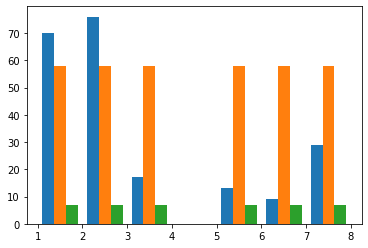

In [34]:
cc_data = pd.DataFrame(np.append(X_und, np.reshape(Y_und, [np.shape(Y_und)[0], 1]), axis=1))
plt.hist([dataframe.loc[:, 'type_of_glass'], smote_data.iloc[:, 9], cc_data.iloc[:, 9]], bins=[1, 2, 3, 4, 5, 6, 7, 8])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2feb43208>,
      dtype=object)

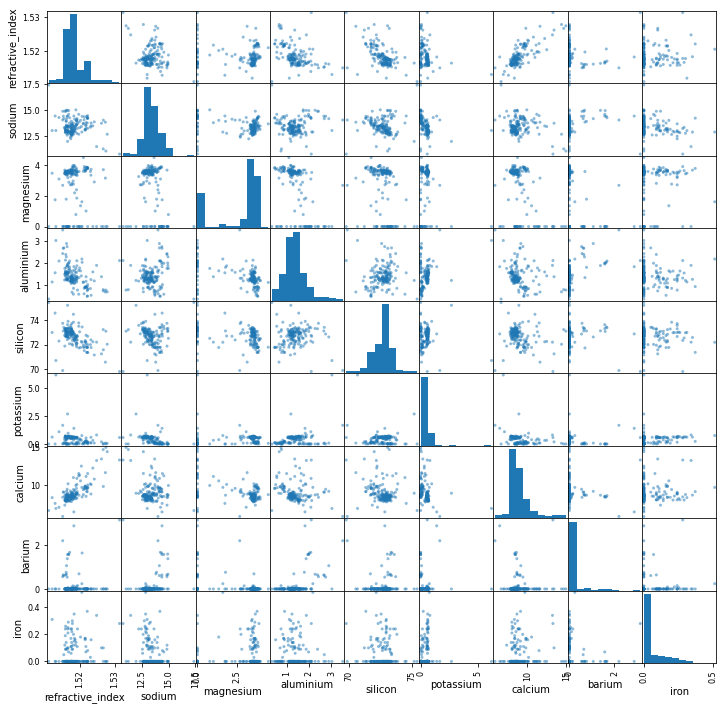

In [39]:
pd.plotting.scatter_matrix(X_train, figsize=(12, 12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2fd59b208>,
      dtype=object)

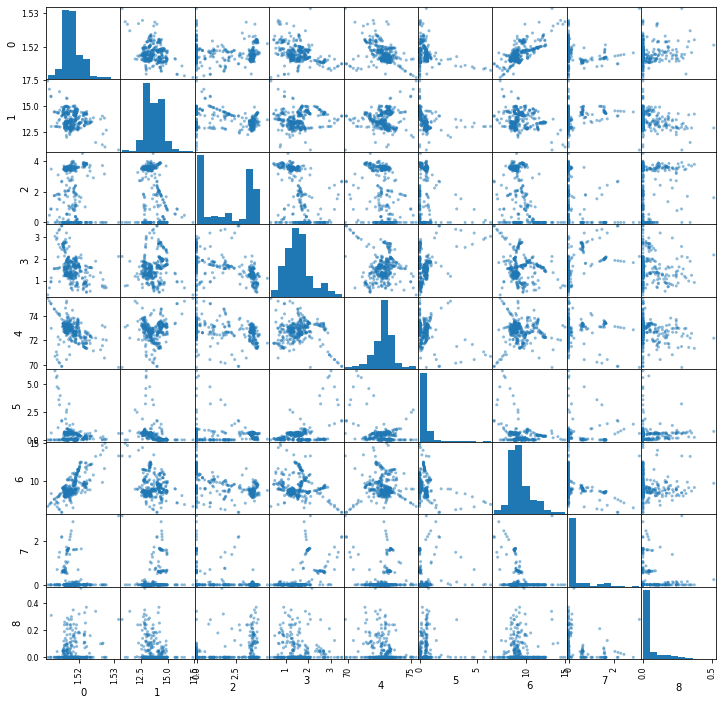

In [41]:
pd.plotting.scatter_matrix(pd.DataFrame(X_res), figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2fbf13198>,
      dtype=object)

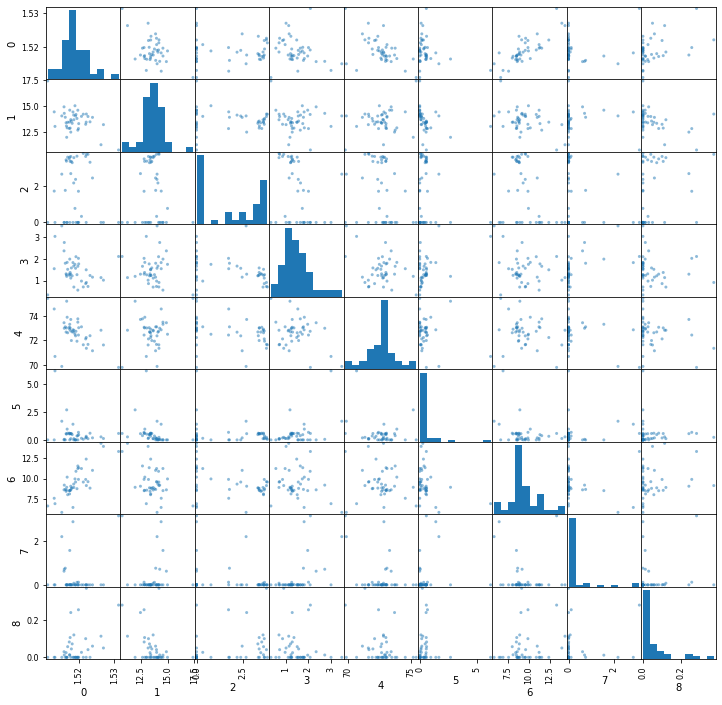

In [42]:
pd.plotting.scatter_matrix(pd.DataFrame(X_und), figsize=(12,12))

In [46]:
param_grid_und = {
       'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [10, 25 ,50, 100, 150, 200, 300, 500]}

xgb_clf_und = xgb.XGBClassifier()

rs_clf_und = RandomizedSearchCV(xgb_clf_und, param_grid_und, n_iter=150,
                            n_jobs=1, verbose=2, cv=3,
                            refit=True, random_state=123)

rs_clf_und.fit(X_und, Y_und)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8 
[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.1s
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8 
[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.0s
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8 
[CV]  subsample=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=300, min_child_weight=7.0, max_depth=6, learning_rate=0, gamma=0.5, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=300, min_child_weight=7.0, max_depth=6, learning_rate=0, gamma=0.5, colsample_bytree=0.5, colsample_bylevel=0.4 
[CV]  subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=300, min_child_weight=7.0, max_depth=6, learning_rate=0, gamma=0.5, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.0s
[CV] subsample=0.7, silent=False, reg_lambda=0.1, n_estimators=500, min_child_weight=3.0, max_depth=20, learning_rate=0, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.7 
[CV]  subsample=0.7, silent=False, reg_lambda=0.1, n_estimators=500, min_child_weight=3.0, max_depth=20, learning_rate=0, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.7, total=   0.1s
[CV] subsample=0.7, silent=False, reg_lambda=0.1, n_estimators=500, 

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   14.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0, 3],
                               

In [48]:
f1 = f1_score(np.array(Y_test), rs_clf_und.predict(np.array(X_test)), average='micro')
bal_ac = balanced_accuracy_score(np.array(Y_test), rs_clf_und.predict(np.array(X_test)))
print(f1, bal_ac)

0.4444444444444444 0.6555555555555556


In [56]:
# Probamos un random forest con los pocos datos del undersampling, quizás el xgboost era demasiado para tan pocos datos

model9 = RandomForestClassifier()
param_grid9 = {'max_depth': np.arange(1, 30), 'min_samples_split': np.arange(2, 30), 'n_estimators': np.arange(1, 600)}
cv9 = RandomizedSearchCV(model9, param_grid9 , refit=False, random_state=123, n_iter=200, verbose=2, cv=2)
fit = cv9.fit(X_und, Y_und) #este tarda un buen rato en hacerse

Fitting 2 folds for each of 200 candidates, totalling 400 fits
[CV] n_estimators=159, min_samples_split=26, max_depth=15 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=159, min_samples_split=26, max_depth=15, total=   0.2s
[CV] n_estimators=159, min_samples_split=26, max_depth=15 ............
[CV]  n_estimators=159, min_samples_split=26, max_depth=15, total=   0.2s
[CV] n_estimators=533, min_samples_split=17, max_depth=17 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=533, min_samples_split=17, max_depth=17, total=   0.7s
[CV] n_estimators=533, min_samples_split=17, max_depth=17 ............
[CV]  n_estimators=533, min_samples_split=17, max_depth=17, total=   0.7s
[CV] n_estimators=477, min_samples_split=20, max_depth=2 .............
[CV]  n_estimators=477, min_samples_split=20, max_depth=2, total=   0.6s
[CV] n_estimators=477, min_samples_split=20, max_depth=2 .............
[CV]  n_estimators=477, min_samples_split=20, max_depth=2, total=   0.6s
[CV] n_estimators=360, min_samples_split=3, max_depth=2 ..............
[CV]  n_estimators=360, min_samples_split=3, max_depth=2, total=   0.5s
[CV] n_estimators=360, min_samples_split=3, max_depth=2 ..............
[CV]  n_estimators=360, min_samples_split=3, max_depth=2, total=   0.5s
[CV] n_estimators=198, min_samples_split=15, max_depth=12 ............
[CV]  n_estimators=198, min_samples_split=15, max_depth=12, total=   0.3s
[CV] n_estimators=198, min_samples_split=15, max_depth=12 ....

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  2.5min finished


In [76]:
results10 = pd.DataFrame(cv9.cv_results_)
results10.sort_values(by=['rank_test_score'], inplace=True)
results10

#huele mal, no saca buenas puntuaciones ni en cv (hay muy pocos datos para hacer el cv, porque hace un 2-folds), pero no es buen indicativo del resultado final

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
163,0.112358,0.000083,0.006659,0.000014,88,2,24,"{'n_estimators': 88, 'min_samples_split': 2, '...",0.428571,0.571429,0.500000,0.071429,1
80,0.260292,0.001382,0.015209,0.000145,213,2,9,"{'n_estimators': 213, 'min_samples_split': 2, ...",0.428571,0.523810,0.476190,0.047619,2
65,0.300511,0.001775,0.017537,0.000079,251,12,2,"{'n_estimators': 251, 'min_samples_split': 12,...",0.428571,0.523810,0.476190,0.047619,2
45,0.179658,0.002207,0.010799,0.000004,149,2,9,"{'n_estimators': 149, 'min_samples_split': 2, ...",0.428571,0.523810,0.476190,0.047619,2
198,0.426334,0.000289,0.025330,0.000653,352,2,11,"{'n_estimators': 352, 'min_samples_split': 2, ...",0.380952,0.571429,0.476190,0.095238,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.475135,0.004475,0.028801,0.001160,396,22,18,"{'n_estimators': 396, 'min_samples_split': 22,...",0.142857,0.142857,0.142857,0.000000,111
137,0.149964,0.003949,0.010229,0.001203,125,29,7,"{'n_estimators': 125, 'min_samples_split': 29,...",0.142857,0.142857,0.142857,0.000000,111
0,0.204200,0.012839,0.015705,0.004451,159,26,15,"{'n_estimators': 159, 'min_samples_split': 26,...",0.142857,0.142857,0.142857,0.000000,111
62,0.435156,0.000210,0.025378,0.000787,354,17,8,"{'n_estimators': 354, 'min_samples_split': 17,...",0.095238,0.142857,0.119048,0.023810,199


**Oversampling con RandomOverSampler**
y después, lo pasamos por el mismo xgboost que el SMOTEado

In [60]:
#Probamos con otra forma de hacer el oversampling, que ha estado teniendo mejores resultados que el undersampling
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_osp, Y_osp = os.fit_resample(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [61]:
param_grid_osp = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [10, 25 ,50, 100, 150, 200, 300, 500]}

xgb_clf_osp = xgb.XGBClassifier()

rs_clf_osp = RandomizedSearchCV(xgb_clf_osp, param_grid_osp, n_iter=150,
                            n_jobs=1, verbose=2, cv=3,
                            refit=True, random_state=123)

rs_clf_osp.fit(X_osp, Y_osp)

Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8 
[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.2s
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.2s
[CV] subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8 
[CV]  subsample=0.5, silent=False, reg_lambda=1.0, n_estimators=300, min_child_weight=10.0, max_depth=15, learning_rate=0, gamma=1.0, colsample_bytree=0.5, colsample_bylevel=0.8, total=   0.2s
[CV] subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=300, min_child_weight=7.0, max_depth=6, learning_rate=0, gamma=0.5, colsample_bytree=0.5, colsample_bylevel=0.4 
[CV]  subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=300, min_child_weight=7.0, max_depth=6, learning_rate=0, gamma=0.5, colsample_bytree=0.5, colsample_bylevel=0.4, total=   0.2s
[CV] subsample=0.8, silent=False, reg_lambda=10.0, n_estimators=300

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:   57.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                                                          0, 3],
                               

In [62]:
f1 = f1_score(np.array(Y_test), rs_clf_osp.predict(np.array(X_test)), average='micro')
bal_ac = balanced_accuracy_score(np.array(Y_test), rs_clf_osp.predict(np.array(X_test)))
print(f1, bal_ac)

0.7407407407407407 0.7055555555555556
